### IMDB Movie Reviews Sentiment Classification
    
Solution workflow: -
* Extract train & test sentences containing 'max_features' most occuring tokens from Keras in-built IMDB dataset (tokens are Positional Index into its vocabulary)... infrequent tokens are commonly represented by some constant.
* Trim/pad sentences to 'maxlen' words
* Define Supervised ML network
    * Embedding gives each token as 'max_features' x 1 Word Vector... Not sure what pre-trained embedding does Keras use??
    * LSTM many-to-one takes in 'maxlen' timesteps of tokens word vector, i.e., 2D matrix for each sentence and actually batch of few sentences (batch size x maxlen x word vector size)
    * Binary Sigmoid layer for binary classification
* Fit model with train & validate (same as test) labeled sentences
* Evaluate accuracy with test sentences

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

from keras.datasets import imdb

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Top frequent tokens
max_features = 5000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [3]:
mylen = np.vectorize(len)
print(mylen(x_train).min(), mylen(x_train).max())

11 2494


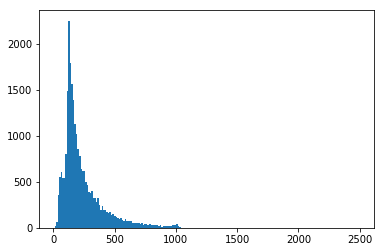

In [4]:
plt.hist(mylen(x_train), 200)
plt.show()

In [5]:
# cut texts after this number of words (among top max_features most common words)
maxlen = 100
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [6]:
x_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117,    2,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194,    2,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30,    2,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16,    2,   19,  178,
         32])

In [7]:
print('Build model...')
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=60))
model.add(LSTM(1, input_shape=(100, 60), dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 60)          300000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 248       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 300,250
Trainable params: 300,250
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 55s 2ms/step - loss: 0.5671 - acc: 0.7247 - val_loss: 0.4843 - val_acc: 0.7919
Epoch 2/5
25000/25000 [==============================] - 56s 2ms/step - loss: 0.4404 - acc: 0.8130 - val_loss: 0.4373 - val_acc: 0.8127
Epoch 3/5
25000/25000 [==============================] - 56s 2ms/step - loss: 0.3905 - acc: 0.8386 - val_loss: 0.4275 - val_acc: 0.8120
Epoch 4/5
25000/25000 [==============================] - 57s 2ms/step - loss: 0.3506 - acc: 0.8586 - val_loss: 0.4128 - val_acc: 0.8252
Epoch 5/5
25000/25000 [==============================] - 57s 2ms/step - loss: 0.3194 - acc: 0.8719 - val_loss: 0.4100 - val_acc: 0.8298


In [9]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 6s 239us/step
Test score: 0.4100220807647705
Test accuracy: 0.82976
